In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe"]#, "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']#, "SigmaRR", 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Upload Dataframes:
periods=[1,2,3,4,5]
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_2.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_2.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_2.h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_2.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_2.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_2.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [5]:
qr_mc1.correctAllY(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_2") 
qr_mc2.correctAllY(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_2") 
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
dfmc = data2.reset_index() 

Loading corrected targets from :  correctedTargetsweights_Period_2_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EE.h5


In [8]:
dfmcEB   = dfmc  .query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfmcEE   = dfmc  .query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')

plotting  R9
plotting  S4
plotting  SigmaIeIe


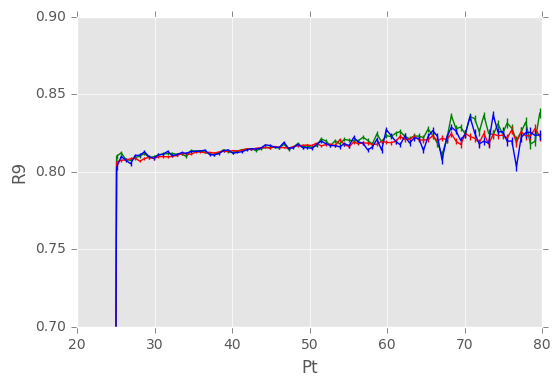

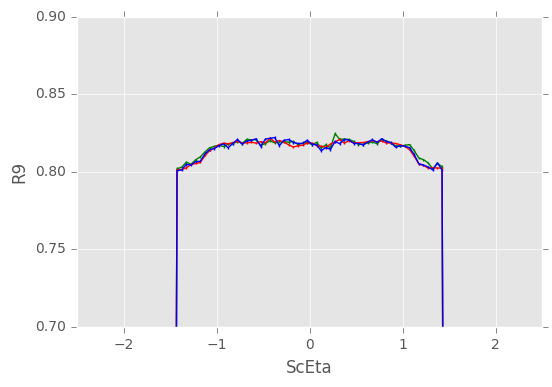

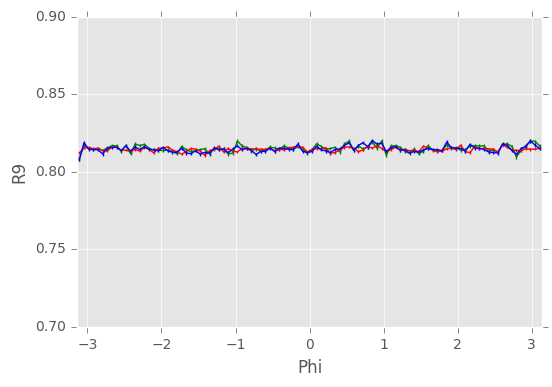

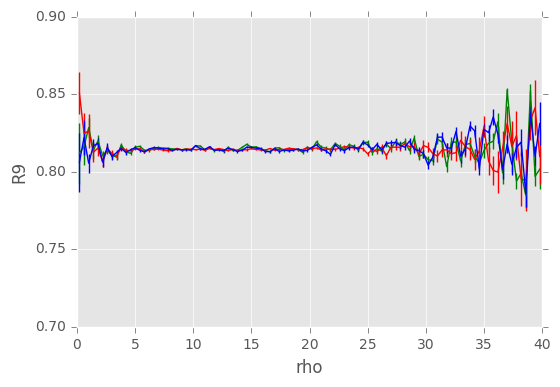

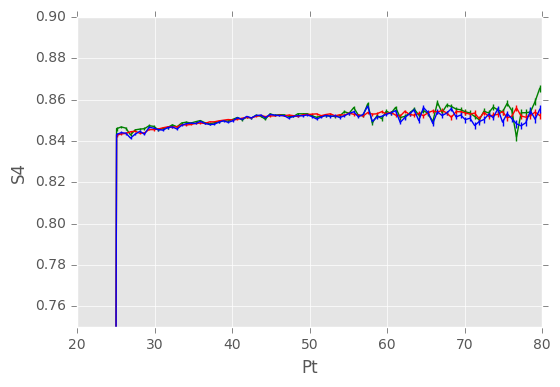

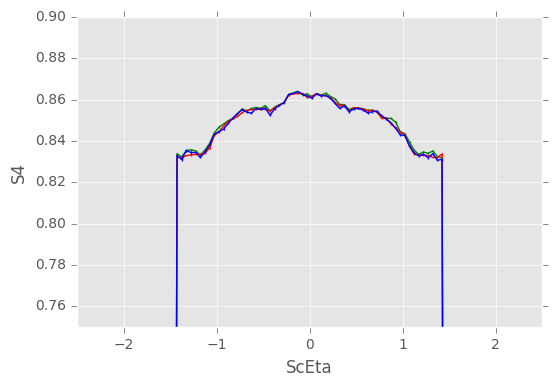

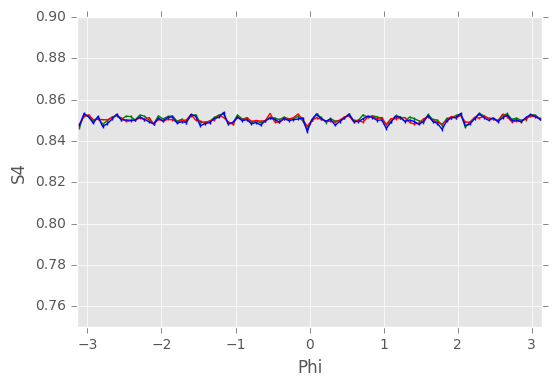

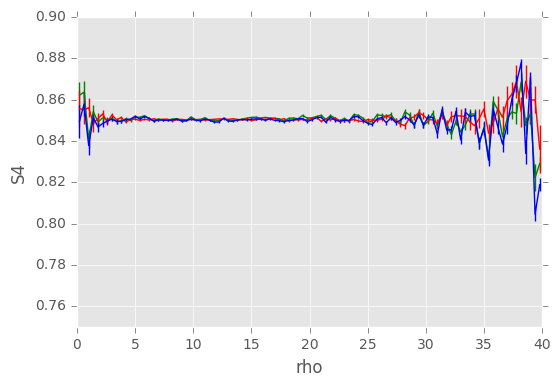

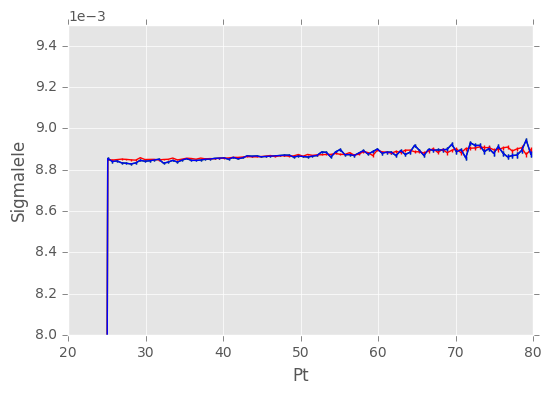

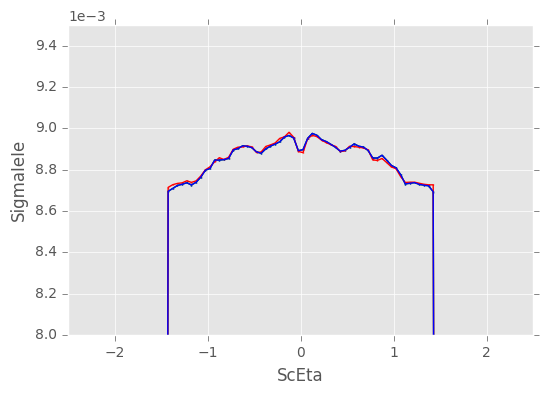

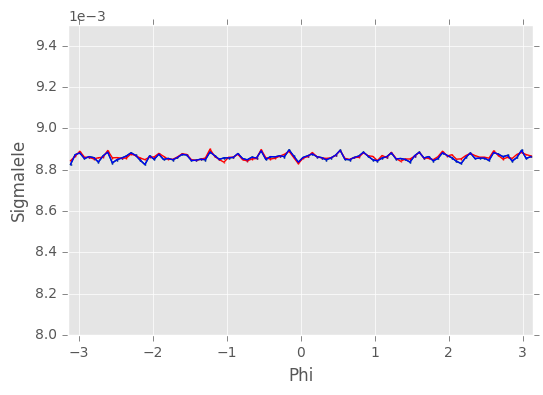

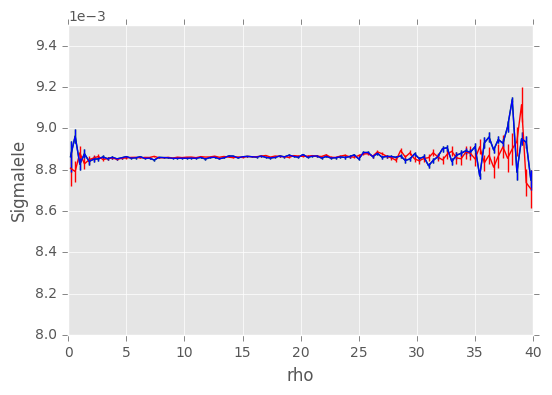

In [12]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEB
dfd=dfdataEB
sec= "EB"
name0="AllPeriods_Profiles_"+sec
section= "section4"
#f = open('Plots/'+section+'.tex', "w")
#f.write('\part{All Periods Profiles '+sec+"}")
#f.close()

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 0.9
        else: minY, maxY = 0.7, 0.9
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.9
        else: minY, maxY = 0.75, 0.9
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.008, 0.0095
        else: minY, maxY = 0.022, 0.028
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
        else: minY, maxY = 0.005, 0.030
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.01, 0.06
        else: 
            minY, maxY = 0.02, 0.06
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
        else: 
            minY, maxY = 0.025, 0.040
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00001, 0.00001
            minY, maxY = -0.0001, 0.0001
    for xvar in X:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(minY,maxY)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        name= name0+yvar+"vs"+xvar
        #fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        #plot.exportToPdf(name,section)